In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# 제가 담당하는 데이터 컬럼을 뽑아냅니다.
my_data = data[data.columns[21:41]]
my_data

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex
1,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex
3,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex
1456,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA
1457,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex
1458,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd


In [4]:
# 제가 담담하는 데이터 컬럼 중에서 범주형 데이터만 뽑아 냅니다.
my_data_cat = my_data.select_dtypes(include='object')
my_data_cat

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex
1,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex
3,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex
1456,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA
1457,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex
1458,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd


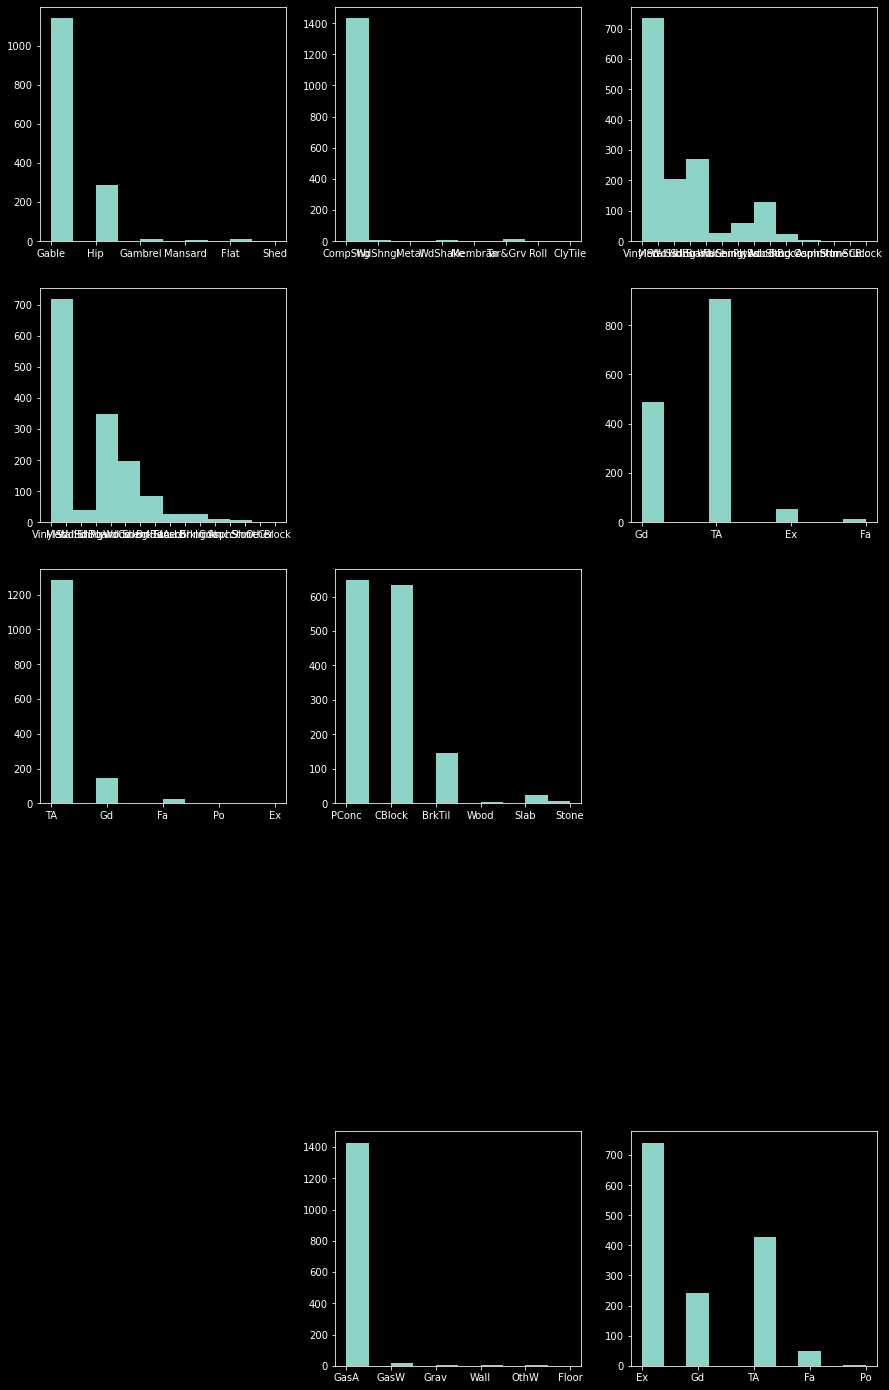

In [5]:
# 제가 담당하는 범주형 데이터를 히스토그램으로 표시합니다.
fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
for i, col in enumerate(my_data_cat.columns):
    if my_data_cat[col].isnull().sum():
        continue
    ax = fig.add_subplot(5,3,i+1)
    ax.hist(my_data_cat[col])

In [6]:
# 제가 담당하는 데이터 중 quality evaluation 에 관한 컬럼만 뽑아냅니다.
qc_column_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC']
qc_cols = my_data_cat[qc_column_list]
qc_cols

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex
...,...,...,...,...,...,...,...,...
1455,TA,TA,Gd,TA,No,Unf,Unf,Ex
1456,TA,TA,Gd,TA,No,ALQ,Rec,TA
1457,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex
1458,TA,TA,TA,TA,Mn,GLQ,Rec,Gd


In [7]:
qc_cols[['ExterQual', 'ExterCond', 'HeatingQC']] = qc_cols[['ExterQual', 'ExterCond','HeatingQC']].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], list(reversed(range(1,6))))
qc_cols[['ExterQual', 'ExterCond','HeatingQC']]

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ExterQual,ExterCond,HeatingQC
0,4,3,5
1,3,3,5
2,4,3,5
3,3,3,4
4,4,3,5
...,...,...,...
1455,3,3,5
1456,3,3,3
1457,5,4,5
1458,3,3,4


In [8]:
qc_cols[['BsmtQual', 'BsmtCond']] = qc_cols[['BsmtQual', 'BsmtCond']].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], list(reversed(range(6))))
qc_cols[['BsmtQual', 'BsmtCond']]

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BsmtQual,BsmtCond
0,4.0,3.0
1,4.0,3.0
2,4.0,3.0
3,3.0,4.0
4,4.0,3.0
...,...,...
1455,4.0,3.0
1456,4.0,3.0
1457,3.0,4.0
1458,3.0,3.0


In [9]:
qc_cols['BsmtExposure'] = qc_cols['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'NA'], list(reversed(range(5))))
qc_cols['BsmtExposure']

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       1.0
1       4.0
2       2.0
3       1.0
4       3.0
       ... 
1455    1.0
1456    1.0
1457    1.0
1458    2.0
1459    1.0
Name: BsmtExposure, Length: 1460, dtype: float64

In [10]:
qc_cols[['BsmtFinType1', 'BsmtFinType2']] = qc_cols[['BsmtFinType1', 'BsmtFinType2']].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'], list(reversed(range(7))))
qc_cols[['BsmtFinType1', 'BsmtFinType2']]

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BsmtFinType1,BsmtFinType2
0,6.0,1.0
1,5.0,1.0
2,6.0,1.0
3,5.0,1.0
4,6.0,1.0
...,...,...
1455,1.0,1.0
1456,5.0,3.0
1457,6.0,1.0
1458,6.0,3.0


In [11]:
# unique 값 확인해서 제대로 replace 되었는지 확인
for col in qc_cols.columns:
    print(col)
    print(qc_cols[col].unique())

ExterQual
[4 3 5 2]
ExterCond
[3 4 2 1 5]
BsmtQual
[ 4.  3.  5. nan  2.]
BsmtCond
[ 3.  4. nan  2.  1.]
BsmtExposure
[ 1.  4.  2.  3. nan]
BsmtFinType1
[ 6.  5.  1.  3.  4. nan  2.]
BsmtFinType2
[ 1.  4. nan  5.  3.  2.  6.]
HeatingQC
[5 4 3 2 1]


In [12]:
# my_data_cat 에 다시 반영해주기
my_data_cat[qc_column_list] = qc_cols

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
# 데이터 타입 확인
my_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1460 non-null   object 
 1   RoofMatl      1460 non-null   object 
 2   Exterior1st   1460 non-null   object 
 3   Exterior2nd   1460 non-null   object 
 4   MasVnrType    1452 non-null   object 
 5   ExterQual     1460 non-null   int64  
 6   ExterCond     1460 non-null   int64  
 7   Foundation    1460 non-null   object 
 8   BsmtQual      1423 non-null   float64
 9   BsmtCond      1423 non-null   float64
 10  BsmtExposure  1422 non-null   float64
 11  BsmtFinType1  1423 non-null   float64
 12  BsmtFinType2  1422 non-null   float64
 13  Heating       1460 non-null   object 
 14  HeatingQC     1460 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 171.2+ KB


In [14]:
my_data_cat = pd.get_dummies(my_data_cat, drop_first=False)
my_data_cat

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,RoofStyle_Flat,RoofStyle_Gable,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,4,3,4.0,3.0,1.0,6.0,1.0,5,0,1,...,1,0,0,0,0,1,0,0,0,0
1,3,3,4.0,3.0,4.0,5.0,1.0,5,0,1,...,0,0,0,0,0,1,0,0,0,0
2,4,3,4.0,3.0,2.0,6.0,1.0,5,0,1,...,1,0,0,0,0,1,0,0,0,0
3,3,3,3.0,4.0,1.0,5.0,1.0,4,0,1,...,0,0,0,0,0,1,0,0,0,0
4,4,3,4.0,3.0,3.0,6.0,1.0,5,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4.0,3.0,1.0,1.0,1.0,5,0,1,...,1,0,0,0,0,1,0,0,0,0
1456,3,3,4.0,3.0,1.0,5.0,3.0,3,0,1,...,0,0,0,0,0,1,0,0,0,0
1457,5,4,3.0,4.0,1.0,6.0,1.0,5,0,1,...,0,0,1,0,0,1,0,0,0,0
1458,3,3,3.0,3.0,2.0,6.0,3.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
my_data[my_data_cat.columns] = my_data_cat

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
my_data


,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,...,1,0,0,0,0,1,0,0,0,0
1,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,...,0,0,0,0,0,1,0,0,0,0
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,...,1,0,0,0,0,1,0,0,0,0
3,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,...,0,0,0,0,0,1,0,0,0,0
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,...,1,0,0,0,0,1,0,0,0,0
1456,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4.0,...,0,0,0,0,0,1,0,0,0,0
1457,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3.0,...,0,0,1,0,0,1,0,0,0,0
1458,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# 원본 데이터에 인코딩 결과를 포함합니다.
data[my_data.columns] = my_data

In [18]:
# 원본 데이터에서 제가 담당하는 column에 대해 상관계수를 봅니다.
data[qc_column_list+['SalePrice']].corr()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,SalePrice
ExterQual,1.000000,0.009184,0.644816,0.163319,0.230614,0.203599,-0.091896,0.520027,0.682639
ExterCond,0.009184,1.000000,-0.089998,0.157795,-0.013849,0.042299,0.054661,0.055520,0.018899
BsmtQual,0.644816,-0.089998,1.000000,0.210796,0.325607,0.275334,-0.078927,0.419100,0.644019
BsmtCond,0.163319,0.157795,0.210796,1.000000,0.089192,0.134097,0.098593,0.121654,0.160658
BsmtExposure,0.230614,-0.013849,0.325607,0.089192,1.000000,0.300230,0.074063,0.126710,0.352958
BsmtFinType1,0.203599,0.042299,0.275334,0.134097,0.300230,1.000000,0.040491,0.128119,0.277436
BsmtFinType2,-0.091896,0.054661,-0.078927,0.098593,0.074063,0.040491,1.000000,-0.058551,-0.040139
HeatingQC,0.520027,0.055520,0.419100,0.121654,0.126710,0.128119,-0.058551,1.000000,0.427649
SalePrice,0.682639,0.018899,0.644019,0.160658,0.352958,0.277436,-0.040139,0.427649,1.000000


In [19]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,1,0,0,0,0,1,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,1,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0


In [1]:
def data3_fun(data):
    data = data.copy()
    data3 = data.iloc[:,41:61]

    # nan처리
    ## Electrical
    data3['Electrical'].fillna('SBrkr')
    ## GarageYrBlt
    data3['GarageYrBlt'].fillna(data3['GarageYrBlt'].mean())

    def prop_fillna(data):
        null_serise = data.isnull().sum()
        for col in data.columns:
            if null_serise[col] > 0:
                prop_serise = data[col].value_counts() # 범주형 데이터의 내부 데이터분포
                prop_list = np.array(prop_serise) / (len(data) - null_serise[col])  # 범주형 데이터의 분포를 확률로 만들기
                data[col] = data[col].apply(
                    lambda x: np.random.choice(prop_serise.index.tolist(), p=prop_list)) # 구한 확률에 따라서 범주 하나를 랜덤하게 선택
        return data

    data3 = prop_fillna(data3)

    # quality -> float형 변환
    ## KithenQual
    data3['KitchenQual'].replace(['Fa','TA','Gd','Ex'], [1,2,3,4], inplace=True)
    data3['KitchenQual'] = data3['KitchenQual'].astype(np.float64)
    ## FireplaceQu
    data3['FireplaceQu'].replace(['Po','Fa','TA','Gd','Ex'], [1,2,3,4,5], inplace=True)
    data3['FireplaceQu'] = data3['FireplaceQu'].astype(np.float64)

    # onehot-encoding
    data3_cat = data3.select_dtypes(include='object')
    data3_cat_cols = data3_cat.columns
    data3_cat = pd.get_dummies(data3_cat, drop_first=False)
    data3[data3_cat.columns] = data3_cat

    data3.drop(data3_cat_cols.tolist(), axis=1., inplace=True)

    return data3

In [2]:
from sklearn.impute import SimpleImputer
import numpy as np

def encoding_data(data):

    def remove_toomuch_nan_cols(data):
        limit = 1460 / 2
        return data.loc[:, data.isnull().sum() < limit]

    data = data.copy()
    my_data = data[data.columns[21:41]] # 제가 담당하는 컬럼만 뽑아냅니다.
    my_data = remove_toomuch_nan_cols(my_data)    # 50% 이상 nan인 컬럼을 지웁니다.
    my_data_cat = my_data.select_dtypes(include='object')   # 그 중 범주형 데이터만 뽑아냅니다.
    my_data_num = my_data.select_dtypes(exclude='object')   # 그 중 숫자형 데이터만 뽑아냅니다.

    # 평균값으로 nan 값을 채웁니다.
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(my_data_num)
    impute_data = imputer.transform(my_data_num)
    my_data_num = pd.DataFrame(impute_data, columns=my_data_num.columns, index=my_data_num.index)

    # 원본 데이터에 포함합니다.
    my_data[my_data_num.columns] = my_data_num

    # quality evaluation 형태의 컬럼만 뽑아냅니다.
    qc_column_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC']
    qc_cols = my_data_cat[qc_column_list]

    # quality evalution 형태의 컬럼 인코딩
    qc_cols[['ExterQual', 'ExterCond', 'HeatingQC']] = qc_cols[['ExterQual', 'ExterCond','HeatingQC']].replace(
        ['Ex', 'Gd', 'TA', 'Fa', 'Po'], list(reversed(range(1,6))))
    qc_cols[['BsmtQual', 'BsmtCond']] = qc_cols[['BsmtQual', 'BsmtCond']].replace(
        ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], list(reversed(range(6))))
    qc_cols['BsmtExposure'] = qc_cols['BsmtExposure'].replace(
        ['Gd', 'Av', 'Mn', 'No', 'NA'], list(reversed(range(5))))
    qc_cols[['BsmtFinType1', 'BsmtFinType2']] = qc_cols[['BsmtFinType1', 'BsmtFinType2']].replace(
        ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'], list(reversed(range(7)))).astype(np.float64)

    # 원본 데이터에 포함합니다.
    my_data_cat[qc_column_list] = qc_cols

    def prop_fillna(data):
        null_serise = data.isnull().sum()
        for col in data.columns:
            if null_serise[col] > 0:
                prop_serise = data[col].value_counts() # 범주형 데이터의 내부 데이터분포
                prop_list = np.array(prop_serise) / (len(data) - null_serise[col])  # 범주형 데이터의 분포를 확률로 만들기
                data[col] = data[col].apply(
                    lambda x: np.random.choice(prop_serise.index.tolist(), p=prop_list)) # 구한 확률에 따라서 범주 하나를 랜덤하게 선택
        return data

    # 원본 데이터에 포함합니다.
    my_data_cat = prop_fillna(my_data_cat)

    # 원 핫 인코딩
    my_data_cat_cols = my_data_cat.columns
    my_data_cat = pd.get_dummies(my_data_cat, drop_first=False)
    # 원본 데이터에 포함합니다.
    my_data[my_data_cat.columns]=my_data_cat
    my_data.drop(my_data_cat_cols.tolist(), axis=1, inplace=True)

    return my_data

In [3]:
def oh_func(df):
    slice_df = df.loc[:, "MSSubClass":"YearRemodAdd"]
    slice_df["LotFrontage"].fillna(slice_df["LotFrontage"].mean(), inplace=True)
    slice_df.drop("Alley", axis=1, inplace=True)
    slice_df["MSSubClass"] = slice_df["MSSubClass"].apply(lambda x: str(x))
    slice_df[["YearBuilt", "YearRemodAdd"]] = slice_df[["YearBuilt", "YearRemodAdd"]].apply(lambda x: np.log(x))
    return pd.get_dummies(slice_df)

In [4]:
def kk_encodeing(data):

    def remove_toomuch_nan_cols(data):
        limit = 1460 / 2
        return data.loc[:, data.isnull().sum() < limit]

    def prop_fillna(data):
        null_serise = data.isnull().sum()
        for col in data.columns:
            if null_serise[col] > 0:
                prop_serise = data[col].value_counts() # 범주형 데이터의 내부 데이터분포
                prop_list = np.array(prop_serise) / (len(data) - null_serise[col])  # 범주형 데이터의 분포를 확률로 만들기
                data[col] = data[col].apply(
                    lambda x: np.random.choice(prop_serise.index.tolist(), p=prop_list)) # 구한 확률에 따라서 범주 하나를 랜덤하게 선택
        return data

    data = data.copy()
    df = data[data.columns[61:]]
    df = remove_toomuch_nan_cols(df)

    df[['GarageQual','GarageCond']] = df[['GarageQual', 'GarageCond']].replace(['NA','Po','Fa','TA','Gd','Ex'], range(6))
    df['PavedDrive'] = df['PavedDrive'].replace(['Y','P','N'], list(reversed(range(3))))

    df_num = df.select_dtypes(exclude='object')

    imputer = SimpleImputer(strategy='mean')
    imputer.fit(df_num)
    impute_data = imputer.transform(df_num)
    df_num = pd.DataFrame(impute_data, columns=df_num.columns, index=df_num.index)

    df_cat = df.select_dtypes(include='object')
    df_cat = prop_fillna(df_cat)
    df_cat_col = df_cat.columns

    df_cat = pd.get_dummies(df_cat, drop_first=False)
    df[df_cat.columns] = df_cat
    df[df_num.columns] = df_num

    df.drop(df_cat_col.tolist(), axis=1, inplace=True)

    return df

In [8]:
data_original = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data_original

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
data_with_test = pd.concat([data_original, test], axis=0)
data_with_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
data3 = data3_fun(data_with_test)
data3

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,856,854,0,1710,0.0,0.0,2,1,3,1,...,1,0,1,0,0,0,0,0,0,1
1,1262,0,0,1262,1.0,0.0,2,0,3,1,...,1,0,1,0,0,0,0,1,0,0
2,920,866,0,1786,0.0,1.0,2,1,3,1,...,1,0,1,0,0,0,0,0,0,1
3,961,756,0,1717,1.0,0.0,1,0,3,1,...,1,0,1,0,0,0,0,0,1,0
4,1145,1053,0,2198,1.0,0.0,2,1,4,1,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,1092,0.0,0.0,1,1,3,1,...,1,0,0,0,0,0,1,0,0,1
1455,546,546,0,1092,0.0,0.0,1,1,3,1,...,1,0,1,0,0,0,0,1,0,0
1456,1224,0,0,1224,1.0,0.0,1,0,4,1,...,1,0,0,0,0,0,1,0,1,0
1457,970,0,0,970,0.0,0.0,1,0,3,1,...,1,0,1,0,0,0,0,0,0,1


In [11]:
data2 = encoding_data(data_with_test)
data2

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,196.0,706.0,0.0,150.0,856.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.0,978.0,0.0,284.0,1262.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,162.0,486.0,0.0,434.0,920.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,216.0,0.0,540.0,756.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,350.0,655.0,0.0,490.0,1145.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,546.0,546.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1455,0.0,252.0,0.0,294.0,546.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1456,0.0,1224.0,0.0,0.0,1224.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1457,0.0,337.0,0.0,575.0,912.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [12]:
data1 = oh_func(data_with_test)
data1

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,7.602401,7.602401,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,7.588830,7.588830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,7.601402,7.601902,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,7.557473,7.585789,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,7.600902,7.600902,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,7.585789,7.585789,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1455,21.0,1894,4,5,7.585789,7.585789,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1456,160.0,20000,5,7,7.580700,7.598900,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,5,5,7.596894,7.596894,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# data4 = KK_incoding(data_with_test)
# data4

In [14]:
data5 = kk_encodeing(data_with_test)
data5

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.0,548.0,3.000000,3.000000,2.0,0.0,61.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2.0,460.0,3.000000,3.000000,2.0,298.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,2.0,608.0,3.000000,3.000000,2.0,0.0,42.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,3.0,642.0,3.000000,3.000000,2.0,0.0,35.0,272.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,3.0,836.0,3.000000,3.000000,2.0,192.0,84.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,2.962319,2.970652,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1.0,286.0,3.000000,3.000000,2.0,0.0,24.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2.0,576.0,3.000000,3.000000,2.0,474.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,0.0,0.0,2.962319,2.970652,2.0,80.0,32.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
data5[['GarageQual','GarageCond']]

,GarageQual,GarageCond
0,3.000000,3.000000
1,3.000000,3.000000
2,3.000000,3.000000
3,3.000000,3.000000
4,3.000000,3.000000
...,...,...
1454,2.962319,2.970652
1455,3.000000,3.000000
1456,3.000000,3.000000
1457,2.962319,2.970652


In [16]:
# data_a = pd.concat([data1, data2, data3, data4], axis=1)
data_b = pd.concat([data1, data2, data3, data5], axis=1)

In [17]:
test_b = data_b.iloc[len(data_original):]
data_b = data_b.iloc[:len(data_original)]

In [18]:
y_train_b = data_original['SalePrice']

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'cosample_bytree':[0.5,0.7,1],
    'cosample_bylevel':[0.5,0.7,1],
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(data_b, y_train_b)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

best = grid_search.best_estimator_

[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cosample_bylevel", "cosample_bytree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'cosample_bylevel': 0.5, 'cosample_bytree': 0.5, 'max_depth': 4, 'n_estimators': 700}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, cosample_bylevel=0.5,
             cosample_bytree=0.5, gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=12,
             num_parallel_tree=1, random_state=0, reg_alpha=0, 

In [345]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators':range(550,700,50),
    'max_features':[20,25,30],
    'bootstrap':[False],
}

model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(data_b, y_train_b)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

best = grid_search.best_estimator_

{'bootstrap': False, 'max_features': 30, 'n_estimators': 550}
RandomForestRegressor(bootstrap=False, max_features=30, n_estimators=550)


In [20]:
result = grid_search.predict(test_b)

In [21]:
test['SalePrice'] = result

In [23]:
test[['Id', 'SalePrice']].to_csv('result3.csv', index=False)